# Desicion Tree Regression:

## importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing dataset

In [2]:
df=pd.read_csv('train.csv')
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

## Imputing for Missing values

In [4]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy='mean')
x=si.fit_transform(x)

## Splitting into Train and test sets:

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


## fitting Desicion tree model:

In [6]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## predicting y

In [7]:
y_pred=dtr.predict(x_test)

## plotting actual vs predicted Tc

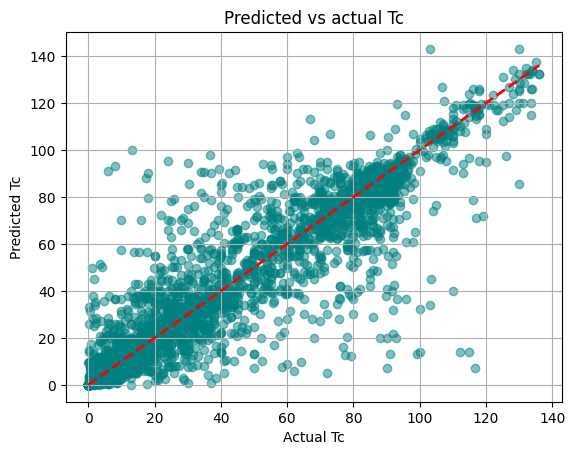

In [11]:
plt.figure()
plt.scatter(y_test,y_pred,c='teal',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Predicted vs actual Tc")
plt.show()

## R2 and RMSE: 

In [12]:
from sklearn.metrics import r2_score, root_mean_squared_error
r2=r2_score(y_true=y_test,y_pred=y_pred)
print(r2)

rmse=root_mean_squared_error(y_true=y_test,y_pred=y_pred)
print(rmse)

0.8674030122875106
12.422976290259532


## PCA 

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)


In [14]:
from sklearn.tree import DecisionTreeRegressor
dtrp=DecisionTreeRegressor(random_state=0)
dtrp.fit(x_train_pca,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


## Predicted Y

In [15]:
y_pred_pca=dtrp.predict(x_test_pca)

## plotting actual vs predicted values

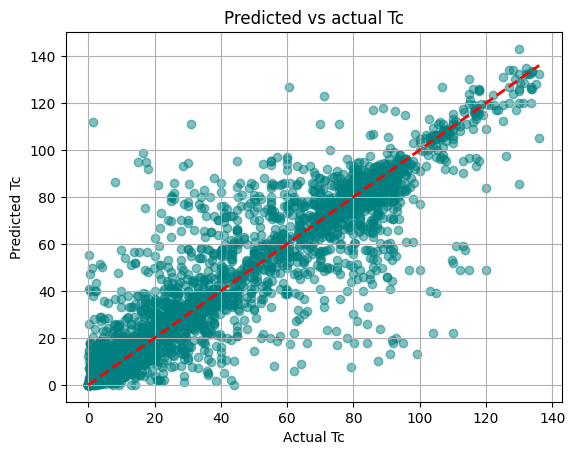

In [16]:
plt.figure()
plt.scatter(y_test,y_pred_pca,c='teal',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
plt.grid(True)
plt.xlabel("Actual Tc")
plt.ylabel("Predicted Tc")
plt.title("Predicted vs actual Tc")
plt.show()

## R2 and RMSE:

In [17]:
from sklearn.metrics import r2_score, root_mean_squared_error
r2_pca=r2_score(y_true=y_test,y_pred=y_pred_pca)
print(r2_pca)

rmse_pca=root_mean_squared_error(y_true=y_test,y_pred=y_pred_pca)
print(rmse_pca)

0.8585496326093351
12.83101070254132
